## News Sentiment Analyzer
This projects aims at finding out the sentiment of the news from different sources that the audience is subjected to. The news headlines and content are carefully divided into three broad categories: positive, negative and neutral based on their analyzed sentiment

#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
import json
import requests
import matplotlib
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
%pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


Choosing NewsApi for the project. NewsAPI provides real time streaming of news from a variety of sources of news publishers.

In [2]:
url = 'https://newsapi.org/v2/everything?'
api_key = '67a04732337d41c09XXXXXXXXXXXXXXX'

In [3]:
# function used to fetch the raw data from the API and process it into a list
def get_articles(file): 
    article_results = [] 
    for i in range(len(file)):
        article_dict = {}
        article_dict['title'] = file[i]['title']
        article_dict['author'] = file[i]['author']
        article_dict['source'] = file[i]['source']
        article_dict['description'] = file[i]['description']
        article_dict['content'] = file[i]['content']
        article_dict['pub_date'] = file[i]['publishedAt']
        article_dict['url'] = file[i]["url"]
        article_dict['photo_url'] = file[i]['urlToImage']
        article_results.append(article_dict)
    return article_results

In [4]:
#ensure that the start date in the API call is no later than one month prior to the current date
parameters_headlines = {
    'q': 'India',
    'sortBy':'popularity',
    'pageSize': 100,
    'apiKey': api_key,
    'language': 'en',
    'from' : '2022-11-24'    
}

In [5]:
# making the API call 
response_headline = requests.get(url, params = parameters_headlines)
response_json_headline = response_headline.json()
responses = response_json_headline['articles']
news_data = pd.DataFrame(get_articles(responses))
news_data.head()

,title,author,source,description,content,pub_date,url,photo_url
0,Google’s Year in Search 2022 was dominated by ...,Mariella Moon,"{'id': 'engadget', 'name': 'Engadget'}",Wordle topped Google's Year in Search for 2022...,Wordle topped Google's Year in Search for 2022...,2022-12-07T12:35:01Z,https://www.engadget.com/google-year-in-search...,https://s.yimg.com/os/creatr-uploaded-images/2...
1,OnePlus 11 5G and Buds Pro 2 event set for Feb...,Kris Holt,"{'id': 'engadget', 'name': 'Engadget'}",OnePlus\r\n has revealed when it will formally...,OnePlus\r\n has revealed when it will formally...,2022-12-19T14:00:54Z,https://www.engadget.com/oneplus-11-5g-buds-pr...,https://s.yimg.com/os/creatr-uploaded-images/2...
2,The Morning After: We tried Dyson’s air-purify...,Mat Smith,"{'id': 'engadget', 'name': 'Engadget'}",Dyson’s Zone is a headset-visor that processes...,Dysons Zone is a headset-visor that processes ...,2022-12-20T12:15:06Z,https://www.engadget.com/the-morning-after-we-...,https://s.yimg.com/os/creatr-uploaded-images/2...
3,7 Best Cookbooks (Winter 2022): I Am From Here...,Joe Ray,"{'id': 'wired', 'name': 'Wired'}",These favorites from the second half of the ye...,"Up until a couple of years ago, or perhaps rig...",2022-12-08T14:00:00Z,https://www.wired.com/gallery/best-cookbooks-f...,https://media.wired.com/photos/6391303e4122499...
4,The Case That Foreshadowed the Lessons of the ...,Antara Haldar,"{'id': 'wired', 'name': 'Wired'}","Before there was SBF, there was another “ethic...","For the past three seemingly glorious years, t...",2022-12-21T14:00:00Z,https://www.wired.com/story/cryptocurrency-sbf...,https://media.wired.com/photos/63a2366d2b5612e...


In [6]:
news_data.shape

(100, 8)

In [7]:
news_data.head()

,title,author,source,description,content,pub_date,url,photo_url
0,Google’s Year in Search 2022 was dominated by ...,Mariella Moon,"{'id': 'engadget', 'name': 'Engadget'}",Wordle topped Google's Year in Search for 2022...,Wordle topped Google's Year in Search for 2022...,2022-12-07T12:35:01Z,https://www.engadget.com/google-year-in-search...,https://s.yimg.com/os/creatr-uploaded-images/2...
1,OnePlus 11 5G and Buds Pro 2 event set for Feb...,Kris Holt,"{'id': 'engadget', 'name': 'Engadget'}",OnePlus\r\n has revealed when it will formally...,OnePlus\r\n has revealed when it will formally...,2022-12-19T14:00:54Z,https://www.engadget.com/oneplus-11-5g-buds-pr...,https://s.yimg.com/os/creatr-uploaded-images/2...
2,The Morning After: We tried Dyson’s air-purify...,Mat Smith,"{'id': 'engadget', 'name': 'Engadget'}",Dyson’s Zone is a headset-visor that processes...,Dysons Zone is a headset-visor that processes ...,2022-12-20T12:15:06Z,https://www.engadget.com/the-morning-after-we-...,https://s.yimg.com/os/creatr-uploaded-images/2...
3,7 Best Cookbooks (Winter 2022): I Am From Here...,Joe Ray,"{'id': 'wired', 'name': 'Wired'}",These favorites from the second half of the ye...,"Up until a couple of years ago, or perhaps rig...",2022-12-08T14:00:00Z,https://www.wired.com/gallery/best-cookbooks-f...,https://media.wired.com/photos/6391303e4122499...
4,The Case That Foreshadowed the Lessons of the ...,Antara Haldar,"{'id': 'wired', 'name': 'Wired'}","Before there was SBF, there was another “ethic...","For the past three seemingly glorious years, t...",2022-12-21T14:00:00Z,https://www.wired.com/story/cryptocurrency-sbf...,https://media.wired.com/photos/63a2366d2b5612e...


#### Data cleaning and preprocessing

In [8]:
news_data['pub_date'] = pd.to_datetime(news_data['pub_date']).apply(lambda x: x.date())

In [9]:
news_data.isnull().sum()

title           0
author         59
source          0
description     0
content         0
pub_date        0
url             0
photo_url       0
dtype: int64

In [10]:
news_data.dropna(inplace= True)

In [11]:
news_data['combined_txt'] = news_data['title'].map(str) + " " + news_data['content'].map(str)

In [12]:
news_data.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_txt
0,Google’s Year in Search 2022 was dominated by ...,Mariella Moon,"{'id': 'engadget', 'name': 'Engadget'}",Wordle topped Google's Year in Search for 2022...,Wordle topped Google's Year in Search for 2022...,2022-12-07,https://www.engadget.com/google-year-in-search...,https://s.yimg.com/os/creatr-uploaded-images/2...,Google’s Year in Search 2022 was dominated by ...
1,OnePlus 11 5G and Buds Pro 2 event set for Feb...,Kris Holt,"{'id': 'engadget', 'name': 'Engadget'}",OnePlus\r\n has revealed when it will formally...,OnePlus\r\n has revealed when it will formally...,2022-12-19,https://www.engadget.com/oneplus-11-5g-buds-pr...,https://s.yimg.com/os/creatr-uploaded-images/2...,OnePlus 11 5G and Buds Pro 2 event set for Feb...
2,The Morning After: We tried Dyson’s air-purify...,Mat Smith,"{'id': 'engadget', 'name': 'Engadget'}",Dyson’s Zone is a headset-visor that processes...,Dysons Zone is a headset-visor that processes ...,2022-12-20,https://www.engadget.com/the-morning-after-we-...,https://s.yimg.com/os/creatr-uploaded-images/2...,The Morning After: We tried Dyson’s air-purify...
3,7 Best Cookbooks (Winter 2022): I Am From Here...,Joe Ray,"{'id': 'wired', 'name': 'Wired'}",These favorites from the second half of the ye...,"Up until a couple of years ago, or perhaps rig...",2022-12-08,https://www.wired.com/gallery/best-cookbooks-f...,https://media.wired.com/photos/6391303e4122499...,7 Best Cookbooks (Winter 2022): I Am From Here...
4,The Case That Foreshadowed the Lessons of the ...,Antara Haldar,"{'id': 'wired', 'name': 'Wired'}","Before there was SBF, there was another “ethic...","For the past three seemingly glorious years, t...",2022-12-21,https://www.wired.com/story/cryptocurrency-sbf...,https://media.wired.com/photos/63a2366d2b5612e...,The Case That Foreshadowed the Lessons of the ...


In [13]:
def removeNonAscii(m):
    return "".join(i for i in m if ord(i)<128)

In [14]:
def cleaning(lines):
    lines = lines.lower()
    lines = re.sub(r"what's", "what is ", lines)
    lines = lines.replace('(ap)', '')
    lines = re.sub(r"\'s", " is ", lines)
    lines = re.sub(r"\'ve", " have ", lines)
    lines = re.sub(r"can't", "cannot ", lines)
    lines = re.sub(r"n't", " not ", lines)
    lines = re.sub(r"i'm", "i am ", lines)
    lines = re.sub(r"\'re", " are ", lines)
    lines = re.sub(r"\'d", " would ", lines)
    lines = re.sub(r"\'ll", " will ", lines)
    lines = re.sub(r'\W+', ' ', lines)
    lines = re.sub(r'\s+', ' ', lines)
    lines = re.sub(r"\\", "", lines)
    lines = re.sub(r"\'", "", lines)    
    lines = re.sub(r"\"", "", lines)
    lines = re.sub('[^a-zA-Z ?!]+', '', lines)
    lines = removeNonAscii(lines)
    lines = lines.strip()
    return lines

    

In [15]:
def stopwords_removal(text):
    f_sentence = []
    stop_words = stopwords.words('english')
    for i in text:
        if i not in stop_words:
            f_sentence.append(i)
    return f_sentence

In [16]:
def lemmatizer(l):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(i) for i in l])

In [17]:
tokenizer = RegexpTokenizer(r'\w+')

In [18]:
def tokenize(text):
    return tokenizer.tokenize(text)

In [19]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gunik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gunik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
news_data['combined_txt'] = news_data['combined_txt'].map(cleaning)
news_data['tokens'] = news_data['combined_txt'].map(tokenize)
news_data['tokens'] = news_data['tokens'].map(stopwords_removal)
news_data['lemms'] = news_data['tokens'].map(lemmatizer)

In [22]:
news_data.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_txt,tokens,lemms
0,Google’s Year in Search 2022 was dominated by ...,Mariella Moon,"{'id': 'engadget', 'name': 'Engadget'}",Wordle topped Google's Year in Search for 2022...,Wordle topped Google's Year in Search for 2022...,2022-12-07,https://www.engadget.com/google-year-in-search...,https://s.yimg.com/os/creatr-uploaded-images/2...,google s year in search was dominated by word...,"[google, year, search, dominated, wordle, ukra...",google year search dominated wordle ukraine cr...
1,OnePlus 11 5G and Buds Pro 2 event set for Feb...,Kris Holt,"{'id': 'engadget', 'name': 'Engadget'}",OnePlus\r\n has revealed when it will formally...,OnePlus\r\n has revealed when it will formally...,2022-12-19,https://www.engadget.com/oneplus-11-5g-buds-pr...,https://s.yimg.com/os/creatr-uploaded-images/2...,oneplus g and buds pro event set for februar...,"[oneplus, g, buds, pro, event, set, february, ...",oneplus g bud pro event set february th oneplu...
2,The Morning After: We tried Dyson’s air-purify...,Mat Smith,"{'id': 'engadget', 'name': 'Engadget'}",Dyson’s Zone is a headset-visor that processes...,Dysons Zone is a headset-visor that processes ...,2022-12-20,https://www.engadget.com/the-morning-after-we-...,https://s.yimg.com/os/creatr-uploaded-images/2...,the morning after we tried dyson s air purifyi...,"[morning, tried, dyson, air, purifying, headph...",morning tried dyson air purifying headphone dy...
3,7 Best Cookbooks (Winter 2022): I Am From Here...,Joe Ray,"{'id': 'wired', 'name': 'Wired'}",These favorites from the second half of the ye...,"Up until a couple of years ago, or perhaps rig...",2022-12-08,https://www.wired.com/gallery/best-cookbooks-f...,https://media.wired.com/photos/6391303e4122499...,best cookbooks winter i am from here budmo th...,"[best, cookbooks, winter, budmo, perfect, loaf...",best cookbook winter budmo perfect loaf couple...
4,The Case That Foreshadowed the Lessons of the ...,Antara Haldar,"{'id': 'wired', 'name': 'Wired'}","Before there was SBF, there was another “ethic...","For the past three seemingly glorious years, t...",2022-12-21,https://www.wired.com/story/cryptocurrency-sbf...,https://media.wired.com/photos/63a2366d2b5612e...,the case that foreshadowed the lessons of the ...,"[case, foreshadowed, lessons, ftx, collapse, p...",case foreshadowed lesson ftx collapse past thr...


In [23]:
news_data.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_txt,tokens,lemms
0,Google’s Year in Search 2022 was dominated by ...,Mariella Moon,"{'id': 'engadget', 'name': 'Engadget'}",Wordle topped Google's Year in Search for 2022...,Wordle topped Google's Year in Search for 2022...,2022-12-07,https://www.engadget.com/google-year-in-search...,https://s.yimg.com/os/creatr-uploaded-images/2...,google s year in search was dominated by word...,"[google, year, search, dominated, wordle, ukra...",google year search dominated wordle ukraine cr...
1,OnePlus 11 5G and Buds Pro 2 event set for Feb...,Kris Holt,"{'id': 'engadget', 'name': 'Engadget'}",OnePlus\r\n has revealed when it will formally...,OnePlus\r\n has revealed when it will formally...,2022-12-19,https://www.engadget.com/oneplus-11-5g-buds-pr...,https://s.yimg.com/os/creatr-uploaded-images/2...,oneplus g and buds pro event set for februar...,"[oneplus, g, buds, pro, event, set, february, ...",oneplus g bud pro event set february th oneplu...
2,The Morning After: We tried Dyson’s air-purify...,Mat Smith,"{'id': 'engadget', 'name': 'Engadget'}",Dyson’s Zone is a headset-visor that processes...,Dysons Zone is a headset-visor that processes ...,2022-12-20,https://www.engadget.com/the-morning-after-we-...,https://s.yimg.com/os/creatr-uploaded-images/2...,the morning after we tried dyson s air purifyi...,"[morning, tried, dyson, air, purifying, headph...",morning tried dyson air purifying headphone dy...
3,7 Best Cookbooks (Winter 2022): I Am From Here...,Joe Ray,"{'id': 'wired', 'name': 'Wired'}",These favorites from the second half of the ye...,"Up until a couple of years ago, or perhaps rig...",2022-12-08,https://www.wired.com/gallery/best-cookbooks-f...,https://media.wired.com/photos/6391303e4122499...,best cookbooks winter i am from here budmo th...,"[best, cookbooks, winter, budmo, perfect, loaf...",best cookbook winter budmo perfect loaf couple...
4,The Case That Foreshadowed the Lessons of the ...,Antara Haldar,"{'id': 'wired', 'name': 'Wired'}","Before there was SBF, there was another “ethic...","For the past three seemingly glorious years, t...",2022-12-21,https://www.wired.com/story/cryptocurrency-sbf...,https://media.wired.com/photos/63a2366d2b5612e...,the case that foreshadowed the lessons of the ...,"[case, foreshadowed, lessons, ftx, collapse, p...",case foreshadowed lesson ftx collapse past thr...


In [24]:
news_data.to_csv('clean_news.csv')

In [25]:
news_data.isnull().sum()

title           0
author          0
source          0
description     0
content         0
pub_date        0
url             0
photo_url       0
combined_txt    0
tokens          0
lemms           0
dtype: int64

In [26]:
news_data.shape


(41, 11)

#### Sentiment Analyzing using Vader library

In [31]:
analyzer = SentimentIntensityAnalyzer()

In [32]:
processed = []
for entry in news_data['lemms']:
    polarity = analyzer.polarity_scores(entry)
    polarity['headline'] = entry
    processed.append(polarity)

In [33]:
headlines_polarity = pd.DataFrame.from_records(processed)

In [34]:
local = []
for entry in news_data['source']:
    local.append(entry)
headlines_polarity['source'] = local

In [35]:
headlines_polarity.head()

,neg,neu,pos,compound,headline,source
0,0.091,0.909,0.000,-0.4588,google year search dominated wordle ukraine cr...,"{'id': 'engadget', 'name': 'Engadget'}"
1,0.000,0.949,0.051,0.1027,oneplus g bud pro event set february th oneplu...,"{'id': 'engadget', 'name': 'Engadget'}"
2,0.000,0.925,0.075,0.2732,morning tried dyson air purifying headphone dy...,"{'id': 'engadget', 'name': 'Engadget'}"
3,0.000,0.760,0.240,0.8360,best cookbook winter budmo perfect loaf couple...,"{'id': 'wired', 'name': 'Wired'}"
4,0.143,0.742,0.115,0.0000,case foreshadowed lesson ftx collapse past thr...,"{'id': 'wired', 'name': 'Wired'}"


In [36]:
headlines_polarity['word_count'] = headlines_polarity['headline'].apply(lambda x: len(str(x).split()))

headlines_polarity['label'] = 0
headlines_polarity.loc[headlines_polarity['compound']>0.05,'label'] = 1
headlines_polarity.loc[headlines_polarity['compound']<-0.05,'label'] = -1



In [37]:
headlines_polarity.head()

,neg,neu,pos,compound,headline,source,word_count,label
0,0.091,0.909,0.000,-0.4588,google year search dominated wordle ukraine cr...,"{'id': 'engadget', 'name': 'Engadget'}",31,-1
1,0.000,0.949,0.051,0.1027,oneplus g bud pro event set february th oneplu...,"{'id': 'engadget', 'name': 'Engadget'}",27,1
2,0.000,0.925,0.075,0.2732,morning tried dyson air purifying headphone dy...,"{'id': 'engadget', 'name': 'Engadget'}",27,1
3,0.000,0.760,0.240,0.8360,best cookbook winter budmo perfect loaf couple...,"{'id': 'wired', 'name': 'Wired'}",27,1
4,0.143,0.742,0.115,0.0000,case foreshadowed lesson ftx collapse past thr...,"{'id': 'wired', 'name': 'Wired'}",30,0


In [38]:
grp = headlines_polarity.groupby(['source','label'])

#### Visualizing the data

Text(0, 0.5, 'Percentage')

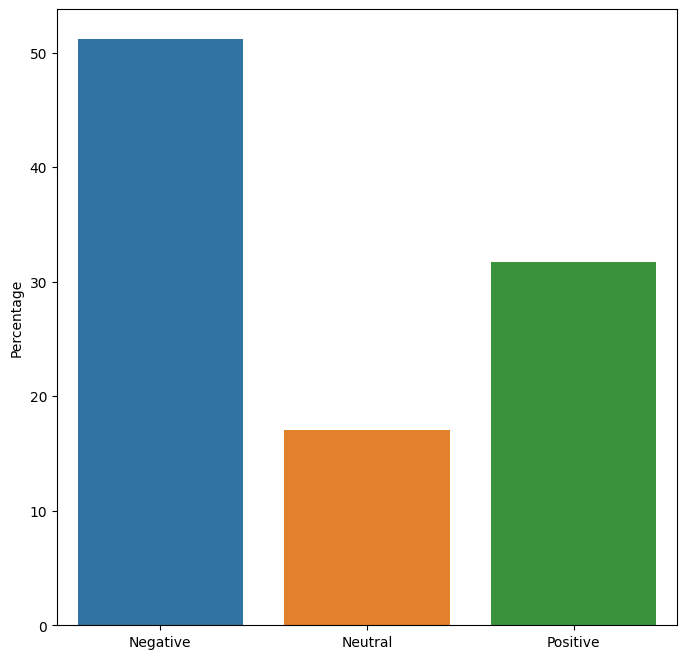

In [39]:
fig, ax = plt.subplots(figsize = (8,8))
counter  = headlines_polarity.label.value_counts(normalize=True)*100
sns.barplot(x = counter.index, y = counter, ax=ax)

ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel('Percentage')

The above bar graph clearly depicts that the distribution of news is quite inclined towards the negative side when talking in terms of its sentiment. While most of the news has an underlying negative sentiment, only a few that is even less than 20% is neutral.

In [40]:
stop_words = stopwords.words('english')
def process(txt):
    tokens = []
    for entry in txt:
        entry = entry.lower()
        tok = tokenizer.tokenize(entry)
        tok = [t for t in tok if t not in stop_words]
        tok.extend(tok)
    return tok

In [ ]:
p_lines = list(headlines_polarity[headlines_polarity.label == 1].headline)
p_tokens = process(p_lines)
p_freq = nltk.FreqDist(p_tokens)

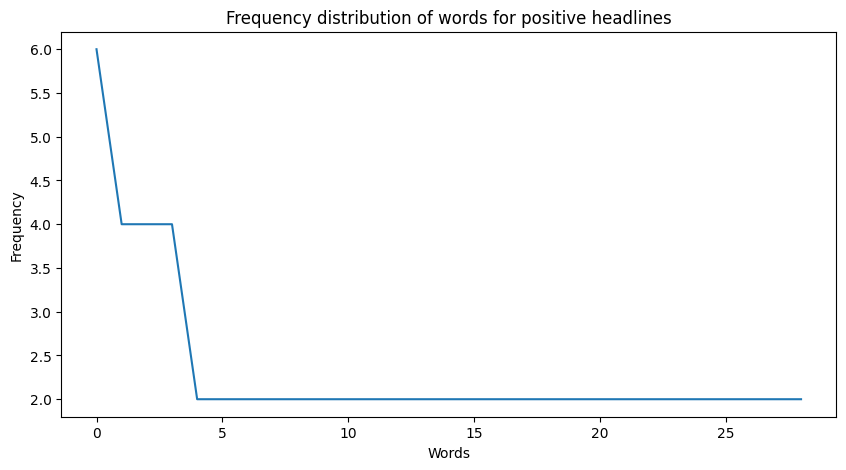

In [ ]:
y_val = [x[1] for x in p_freq.most_common()]
fig = plt.figure(figsize = (10,5))
plt.plot(y_val)
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.title('Frequency distribution of words for positive headlines')
plt.show()

In [ ]:
n_lines = list(headlines_polarity[headlines_polarity.label == -1].headline)
n_tokens = process(n_lines)
n_freq = nltk.FreqDist(n_tokens)

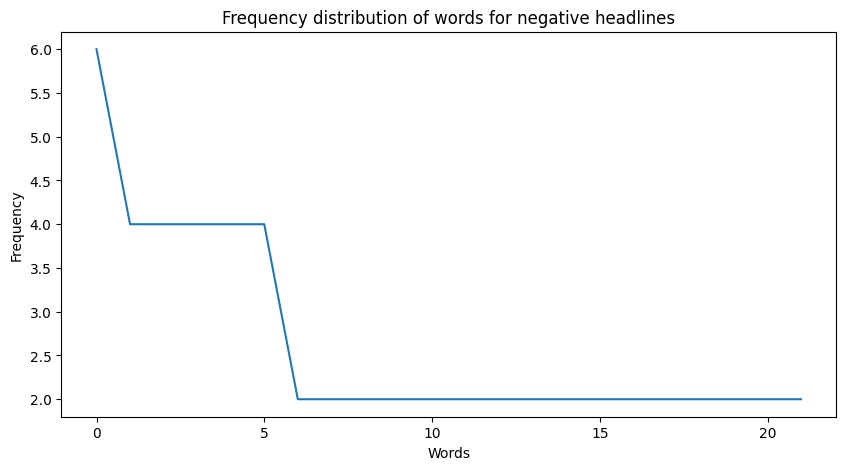

In [ ]:
y_val = [x[1] for x in n_freq.most_common()]
fig = plt.figure(figsize = (10,5))
plt.plot(y_val)
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.title('Frequency distribution of words for negative headlines')
plt.show()

In [ ]:
data = news_data


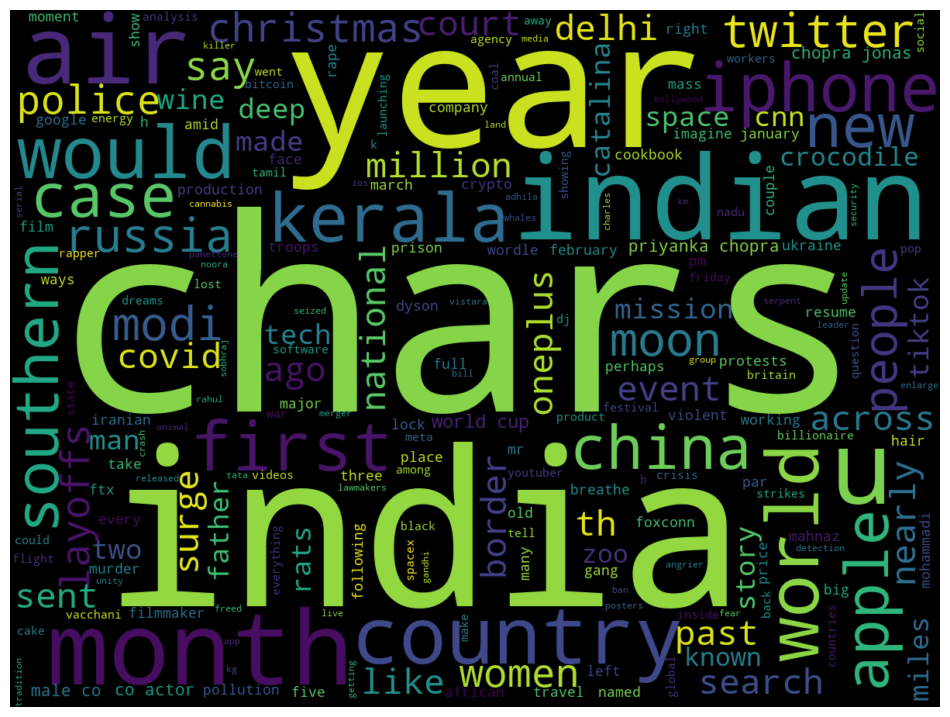

In [ ]:
w = WordCloud(stopwords=stop_words,max_words=600,background_color='black',scale=3,width=400,height=300).generate(' '.join(data['combined_txt']))
plt.figure(figsize = (12,12))
plt.imshow(w,interpolation ='bilinear')
plt.axis('off')
plt.show()